In [16]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#Reading the dataset
kidney = pd.read_csv("../DataSets/kidney_disease.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [18]:
# Information about the dataset
kidney.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [19]:
# Description of the dataset
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [20]:
kidney[['htn','dm','cad','pe','ane']] = kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney[['rbc','pc']] = kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney[['pcc','ba']] = kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney[['appet']] = kidney[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
kidney['classification'] = kidney['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
kidney.rename(columns={'classification':'class'},inplace=True)

kidney['pe'] = kidney['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney['appet'] = kidney['appet'].replace(to_replace='no',value=0)
kidney['cad'] = kidney['cad'].replace(to_replace='\tno',value=0)
kidney['dm'] = kidney['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney.drop('id',axis=1,inplace=True)

In [21]:
kidney=kidney.drop(["su","rbc","rc","wc","pot","sod","sg","pc","ba","cad","pe","ane"],axis=1)

In [22]:
kidney.head()

,age,bp,al,pcc,bgr,bu,sc,hemo,pcv,htn,dm,appet,class
0,48.0,80.0,1.0,0.0,121.0,36.0,1.2,15.4,44,1.0,1.0,1.0,1.0
1,7.0,50.0,4.0,0.0,NaN,18.0,0.8,11.3,38,0.0,0.0,1.0,1.0
2,62.0,80.0,2.0,0.0,423.0,53.0,1.8,9.6,31,0.0,1.0,0.0,1.0
3,48.0,70.0,4.0,1.0,117.0,56.0,3.8,11.2,32,1.0,0.0,0.0,1.0
4,51.0,80.0,2.0,0.0,106.0,26.0,1.4,11.6,35,0.0,0.0,1.0,1.0


In [23]:
kidney.isnull().sum(axis = 1)


0      0
1      1
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [25]:
kidney2 = kidney.dropna()
print(kidney2.shape)

(257, 13)


<AxesSubplot:>

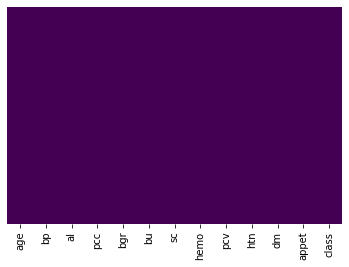

In [26]:
# Now our dataset is clean
sns.heatmap(kidney2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

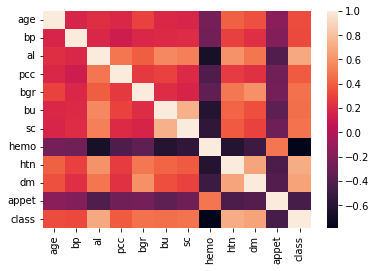

In [27]:
sns.heatmap(kidney2.corr())

In [28]:
print(kidney2.groupby('rbc').rbc.count().plot(kind="bar"))

KeyError: 'rbc'

KeyError: 'su'

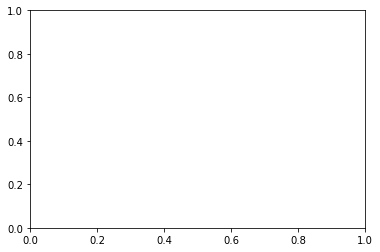

In [29]:
kidney2.plot(kind='scatter', x='age',y='su');
plt.show()


In [30]:
# Shows the maximum blood pressure having chronic kidney disease
print(kidney2.groupby('class').bp.max())

class
0.0     80.0
1.0    180.0
Name: bp, dtype: float64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(kidney2.iloc[:,:-1], kidney2['class'], test_size=0.33, random_state=44, stratify= kidney2['class'])


In [32]:
print(X_train.shape)

(172, 12)


In [33]:
y_train.value_counts()

1.0    88
0.0    84
Name: class, dtype: int64

In [34]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

In [35]:
rfc_pred = rfc_fit.predict(X_test)

In [36]:
print(confusion_matrix(y_test,rfc_pred))

[[41  0]
 [ 1 43]]


In [37]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        41
         1.0       1.00      0.98      0.99        44

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85



In [ ]:
import pickle
file=open("Kidney1.pkl",'wb')
pickle.dump(rfc_fit, file)